In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_excel("Election_Data.xlsx","Election_Dataset_Two Classes")
new = df.drop("Unnamed: 0" , axis=1)

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
new.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
5,Labour,47,3,4,4,4,4,2,male
6,Labour,57,2,2,4,4,11,2,male
7,Labour,77,3,4,4,1,1,0,male
8,Labour,39,3,3,4,4,11,0,female
9,Labour,70,3,2,5,1,11,2,male


In [6]:
new.shape

(1525, 9)

In [164]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [165]:
new.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [166]:
df.describe(include="all")

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1525.000000,1525,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Labour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female
freq,NaN,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,812
mean,763.000000,NaN,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295,NaN
std,440.373894,NaN,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315,NaN
min,1.000000,NaN,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,382.000000,NaN,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,NaN
50%,763.000000,NaN,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,NaN
75%,1144.000000,NaN,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,NaN


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [168]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [169]:
df = df.drop("Unnamed: 0",axis=1)

In [170]:
dups = df.duplicated()
print(dups.sum())

8


In [171]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [172]:
df.shape

(1525, 9)

In [173]:
df.select_dtypes(include='object')

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male
...,...,...
1520,Conservative,male
1521,Conservative,male
1522,Labour,male
1523,Conservative,male


In [174]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [175]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


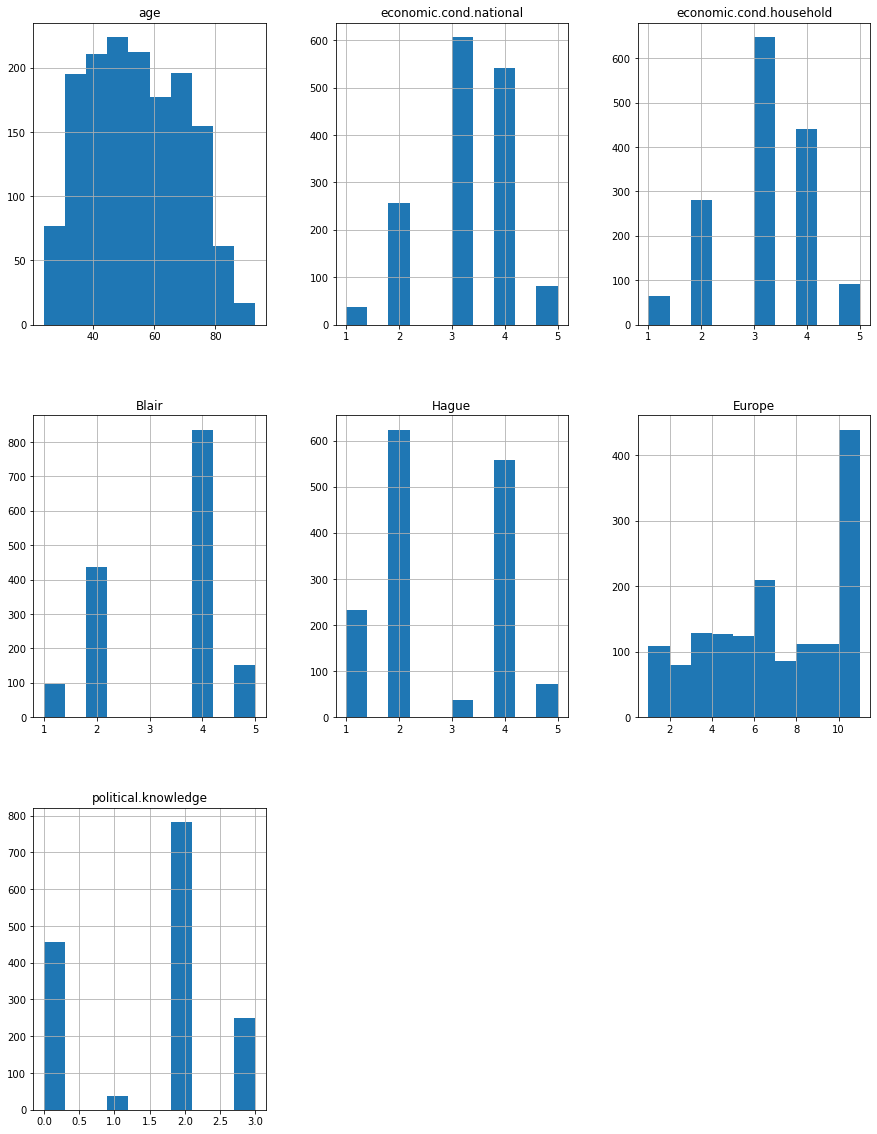

In [176]:
#Univariate analysis

new.hist(figsize=(15,20));

In [177]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [178]:
import scipy.stats as stats

# Measure the skeweness of the required columns
Skewness = pd.DataFrame({'Skewness' : [stats.skew(new.age),stats.skew(new['economic.cond.national']),
                                       stats.skew(new['economic.cond.household']),stats.skew(new.Blair),
                                       stats.skew(new.Hague), stats.skew(new.Europe), 
                                       stats.skew(new['political.knowledge'])]},
                        index=['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 
                               'Europe', 'political.knowledge'])  

Skewness

,Skewness
age,0.144478
economic.cond.national,-0.240216
economic.cond.household,-0.149405
Blair,-0.534892
Hague,0.151950
Europe,-0.135813
political.knowledge,-0.426418


In [179]:
import seaborn as sns

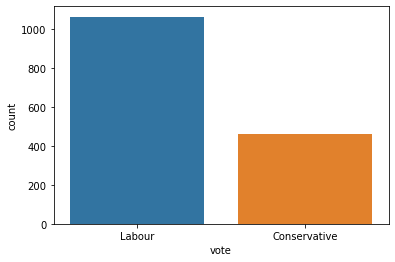

In [180]:
sns.countplot(new['vote']);

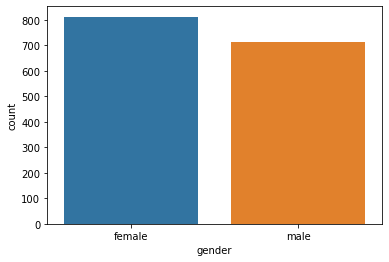

In [181]:
sns.countplot(new['gender']);

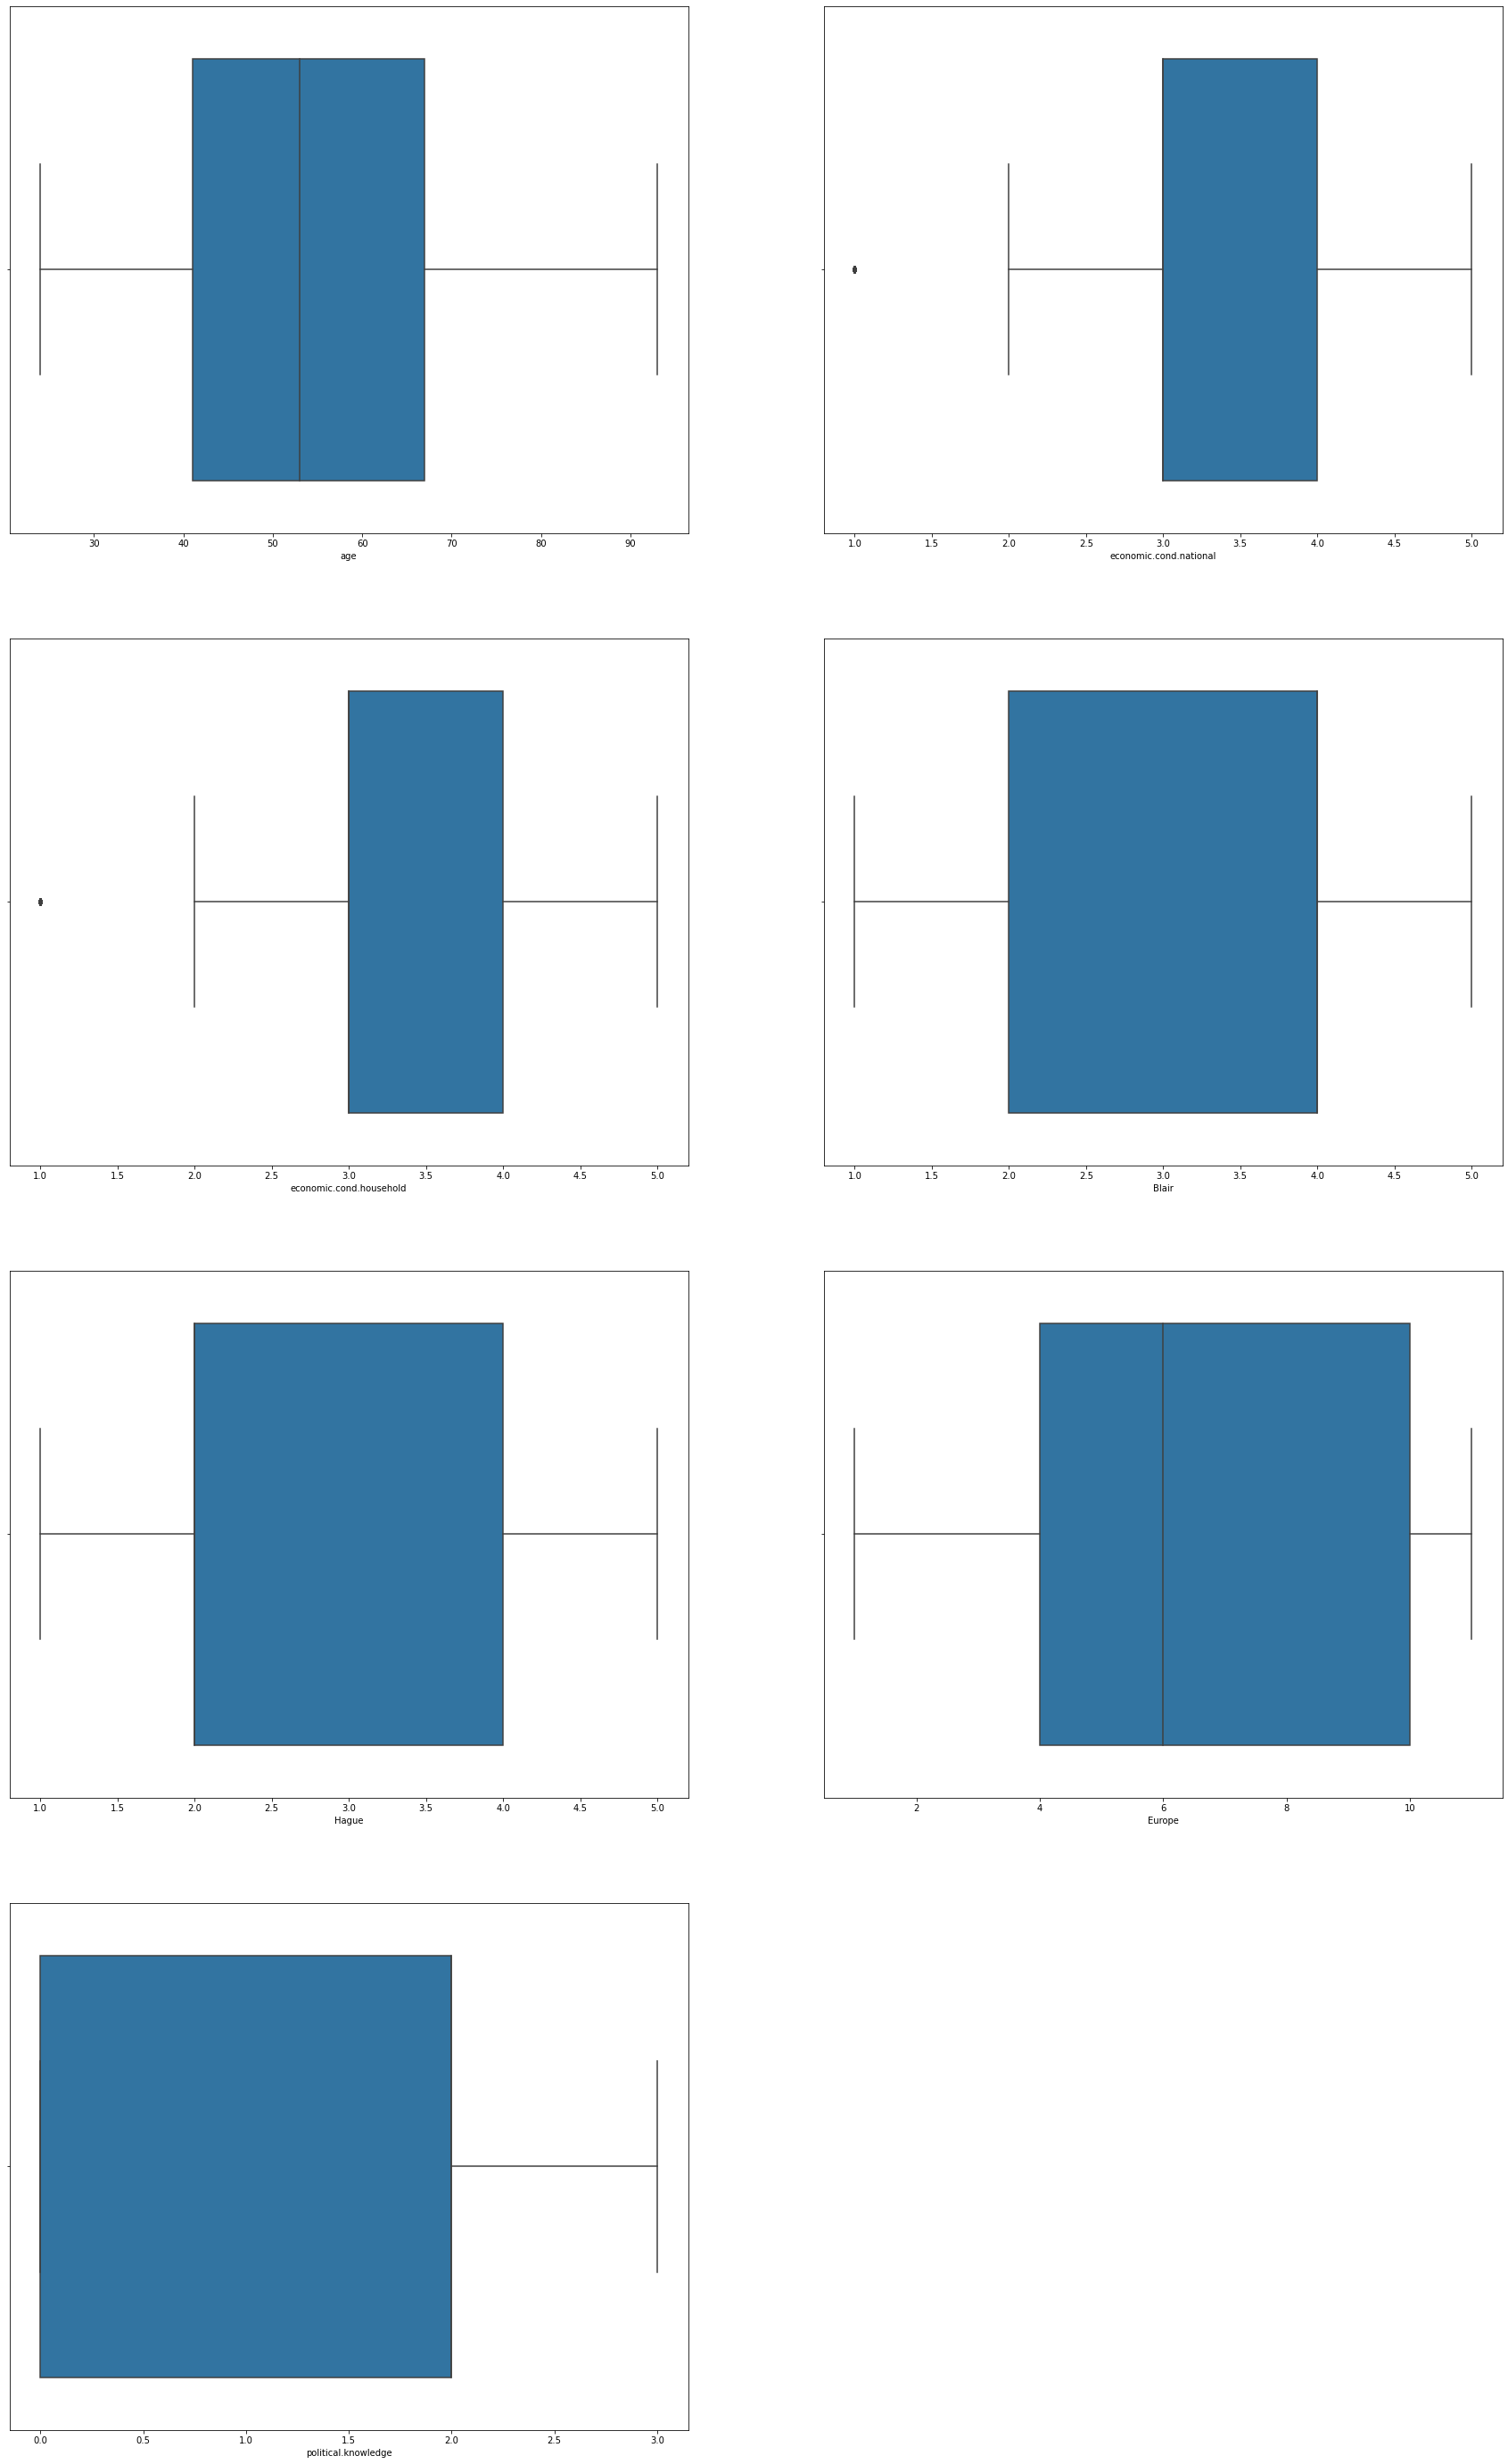

In [182]:
plt.figure(figsize=(30,50))

My_coulmns = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 
                               'Europe', 'political.knowledge']
for i in range(0,7):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[My_coulmns[i]])

<AxesSubplot:>

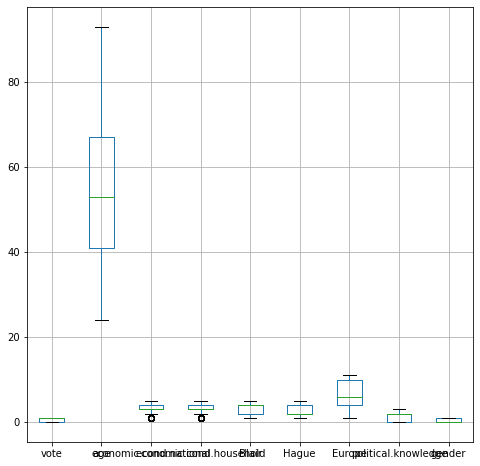

In [183]:
df.boxplot(figsize=(8,8))

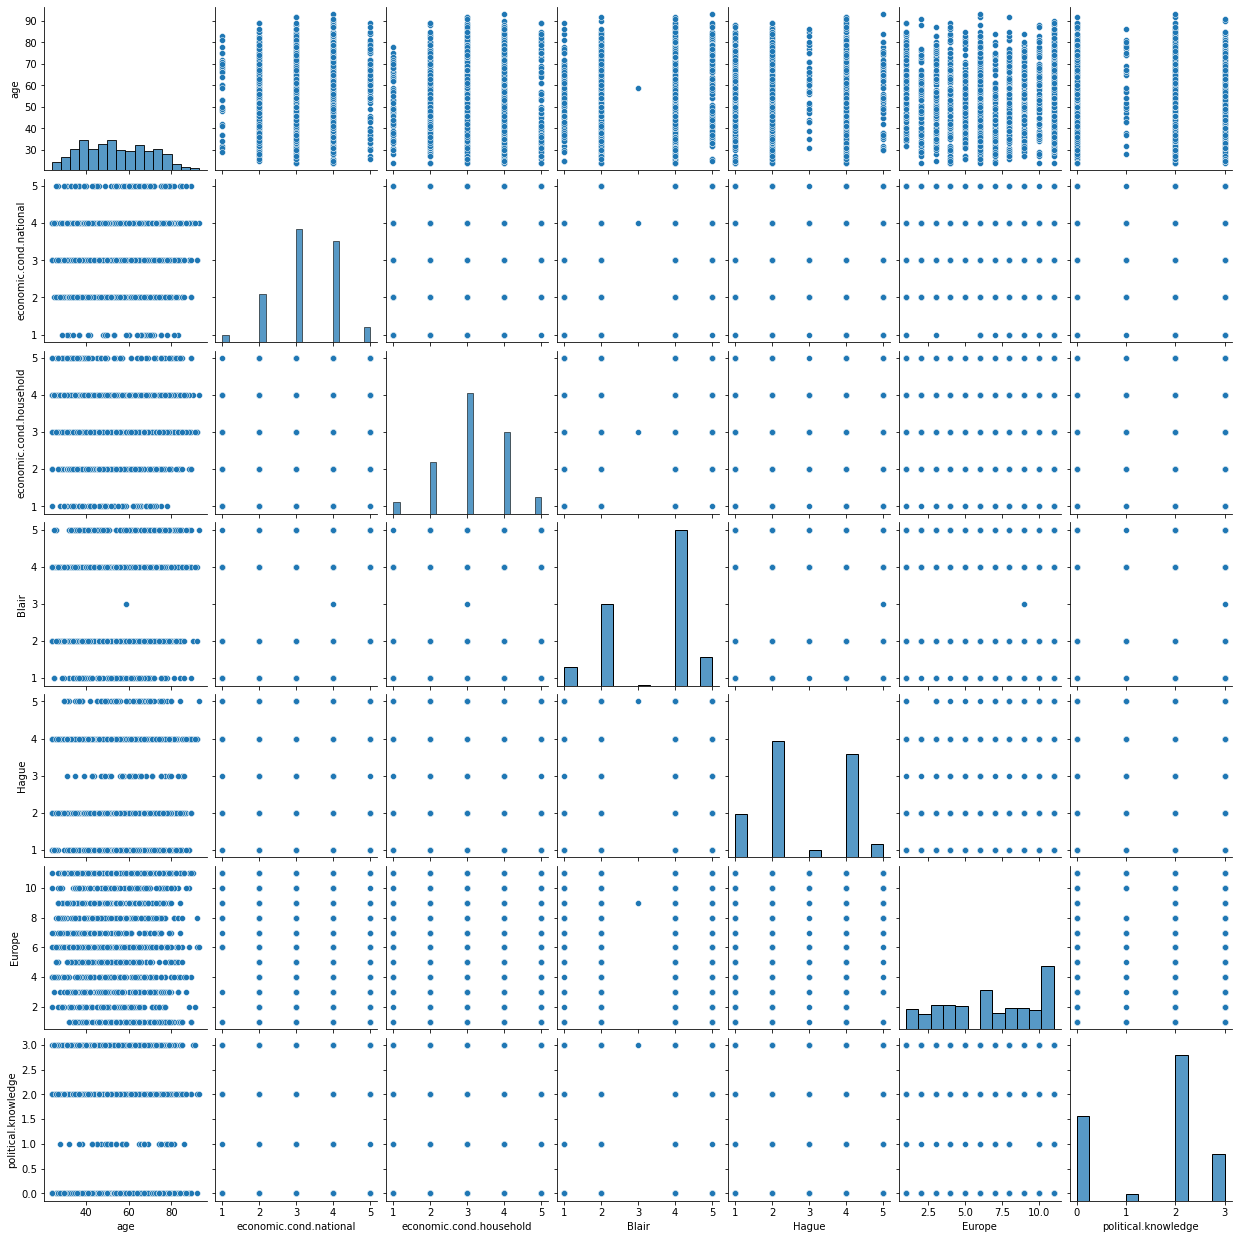

In [184]:
sns.pairplot(data=new)
plt.show()

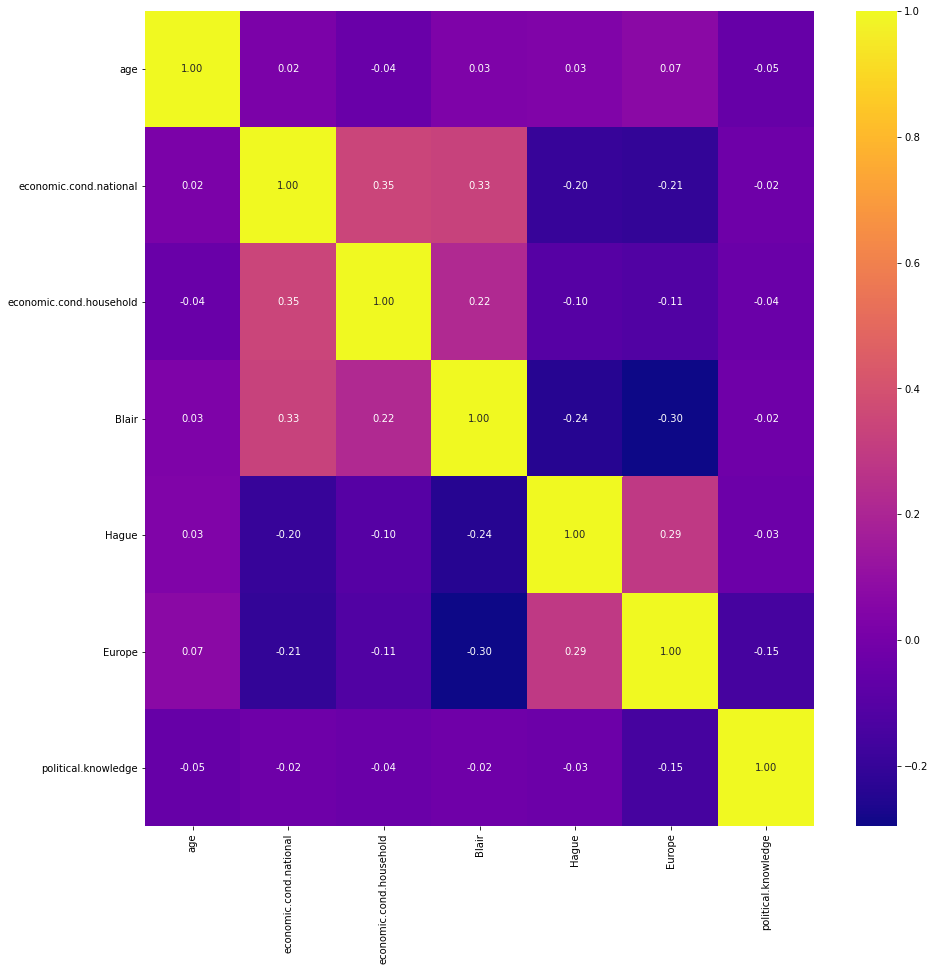

In [185]:
plt.figure(figsize=(15,15))
sns.heatmap(new.corr(),annot=True,fmt=".2f", cmap='plasma');

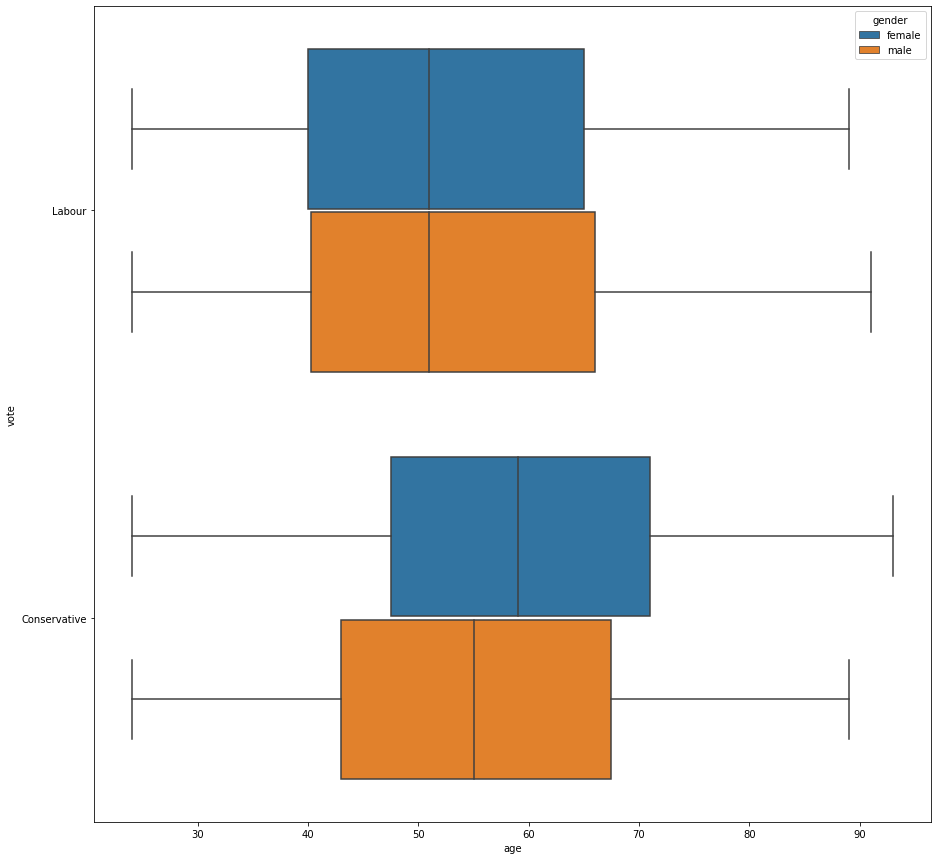

In [186]:
plt.figure(figsize=(15,15))
sns.boxplot(new['age'], new['vote'], hue=new['gender']);

In [187]:
df.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [188]:
df [df.isnull().any(axis=1)]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [189]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [190]:
#Declare the independent and dependent variables

X = df.drop('vote', axis=1)

y = df[['vote']]


In [191]:
from sklearn.model_selection import train_test_split

In [192]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30,random_state = 1, stratify = y)


## -------------------------------------------------------------------------------------------------------------

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix


In [194]:
# Fit the Logistic Regression model
#?LogisticRegression

Logitmodel = LogisticRegression(solver = 'newton-cg',max_iter = 10000, penalty = 'none', verbose = True, n_jobs= 2 )
Logitmodel.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [195]:
y_train_predict = Logitmodel.predict(X_train)
y_test_predict = Logitmodel.predict(X_test)

In [196]:
y_train_predict_prob = Logitmodel.predict_proba(X_test)
pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.224050,0.775950
1,0.084854,0.915146
2,0.061856,0.938144
3,0.260679,0.739321
4,0.019344,0.980656


In [197]:
# Accuracy - Training Data
Logit_train_acc = Logitmodel.score(X_train,y_train)
Logit_train_acc


0.8303655107778819

AUC: 0.877


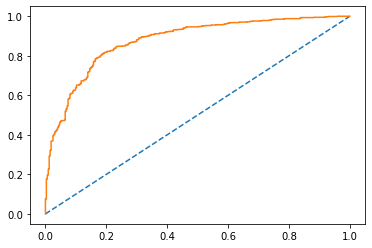

In [198]:
# predict probabilities
probs = Logitmodel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logit_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % Logit_train_auc)
# calculate roc curve
Logit_train_fpr, Logit_train_tpr, Logit_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logit_train_fpr, Logit_train_tpr);

In [199]:
# Accuracy - Test Data
Logit_test_acc = Logitmodel.score(X_test,y_test)
Logit_test_acc

0.8493449781659389

AUC: 0.914


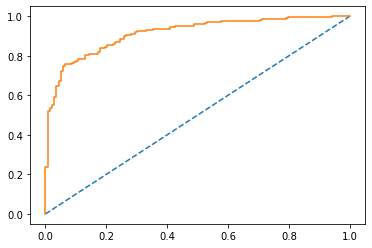

In [200]:
# predict probabilities
probs = Logitmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
Logit_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % Logit_test_auc)
# calculate roc curve
Logit_test_fpr, Logit_test_tpr, Logit_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(Logit_test_fpr, Logit_test_tpr);

In [201]:
confusion_matrix(y_train, y_train_predict)

array([[211, 112],
       [ 69, 675]])

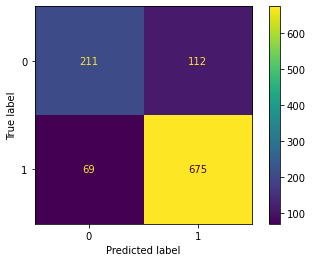

In [202]:
plot_confusion_matrix(Logitmodel,X_train, y_train)

In [203]:
    print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



In [204]:
Logit_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(Logit_metrics).transpose()
Logit_train_f1=round(df.loc["1"][2],2)
Logit_train_recall=round(df.loc["1"][1],2)
Logit_train_precision=round(df.loc["1"][0],2)
print ('Logit_train_precision ',Logit_train_precision)
print ('Logit_train_recall ',Logit_train_recall)
print ('Logit_train_f1 ',Logit_train_f1)

Logit_train_precision  0.86
Logit_train_recall  0.91
Logit_train_f1  0.88


In [205]:
confusion_matrix(y_test, y_test_predict)

array([[ 94,  45],
       [ 24, 295]])

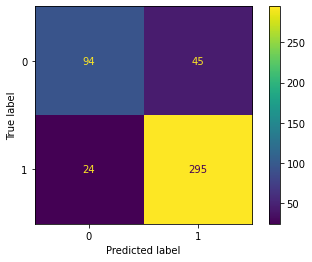

In [206]:
plot_confusion_matrix(Logitmodel,X_test, y_test)

In [207]:
    print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



In [208]:
Logit_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(Logit_metrics).transpose()
Logit_test_precision=round(df.loc["1"][0],2)
Logit_test_recall=round(df.loc["1"][1],2)
Logit_test_f1=round(df.loc["1"][2],2)
print ('Logit_test_precision ',Logit_test_precision)
print ('Logit_test_recall ',Logit_test_recall)
print ('Logit_test_f1 ',Logit_test_f1)

Logit_test_precision  0.87
Logit_test_recall  0.92
Logit_test_f1  0.9


In [209]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [210]:
Logitmodel = LogisticRegression(max_iter=10000,n_jobs=2)

## ------------------------------------------------------------------------------------------------------------

In [211]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [212]:
##Linear Discriminant Anaylsis

# Creating a copy of the original data frame

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.30,random_state=1,stratify = y)

print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (1067, 8)
Number of rows and columns of the training set for the dependent variable: (1067, 1)
Number of rows and columns of the test set for the independent variables: (458, 8)
Number of rows and columns of the test set for the dependent variable: (458, 1)


In [213]:
#Build LDA Model
#?LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDAmodel=clf.fit(X_train,y_train)
#?clf.decision_function #-----
posterior = clf.decision_function(X_train)
print(posterior)
print(np.exp(posterior))

[2.62862002 1.47684219 2.99513623 ... 2.58872556 1.20414805 1.31691656]
[13.85463763  4.37909548 19.98808265 ... 13.31279444  3.33391753
  3.73189654]


In [214]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDAmodel.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDAmodel.predict(X_test)

print(pred_class_test)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 1 0 1 1 0 1]


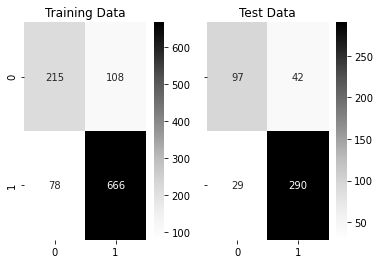

In [215]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [216]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.90      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.82      1067
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



In [217]:
# Training Data Probability Prediction
?LDAmodel.predict_proba

#y_pred = (clf.predict_proba(X_test)[:,1] >= 0.3).astype(bool) # set threshold as 0.3
pred_prob_train = LDAmodel.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDAmodel.predict_proba(X_test)

In [218]:
# Accuracy - Training Data
LDA_train_acc = LDAmodel.score(X_train,y_train)
print(LDA_train_acc)

# Accuracy - Test Data
LDA_test_acc = LDAmodel.score(X_test,y_test)
print(LDA_test_acc)

0.8256794751640113
0.8449781659388647


AUC for the Training Data: 0.876
AUC for the Test Data: 0.915


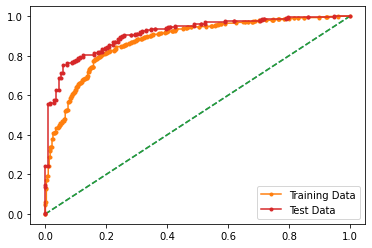

In [219]:
# AUC and ROC for the training data

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Training Data: 0.876


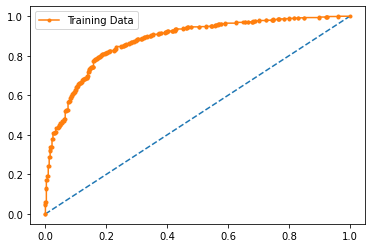

In [220]:
# AUC and ROC for the training data

# calculate AUC
LDA_train_auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % LDA_train_auc)

#  calculate roc curve
LDA_train_fpr, LDA_train_tpr, LDA_train_thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_train_fpr, LDA_train_tpr, marker='.',label = 'Training Data')

# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.915


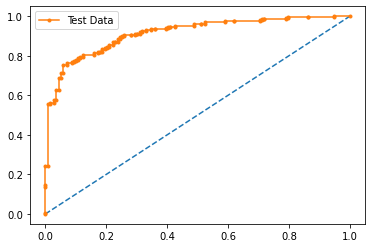

In [221]:

# AUC and ROC for the test data

# calculate AUC
LDA_test_auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % LDA_test_auc)

#  calculate roc curve
LDA_test_fpr, LDA_test_tpr, LDA_test_thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(LDA_test_fpr, LDA_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

0.1 

Accuracy Score 0.7451
F1 Score 0.844 

Confusion Matrix


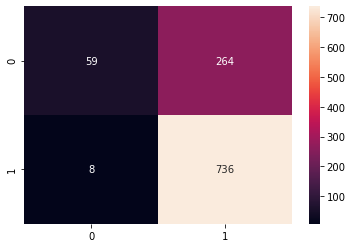

0.2 

Accuracy Score 0.7863
F1 Score 0.8635 

Confusion Matrix


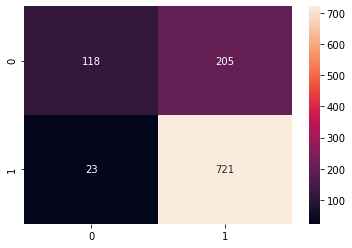

0.3 

Accuracy Score 0.8097
F1 Score 0.8741 

Confusion Matrix


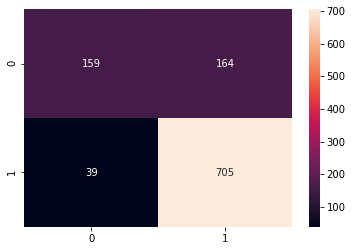

0.4 

Accuracy Score 0.8219
F1 Score 0.8788 

Confusion Matrix


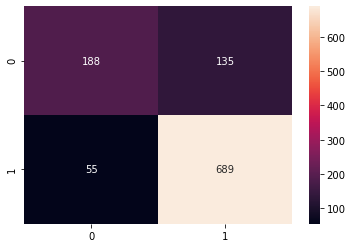

0.5 

Accuracy Score 0.8257
F1 Score 0.8775 

Confusion Matrix


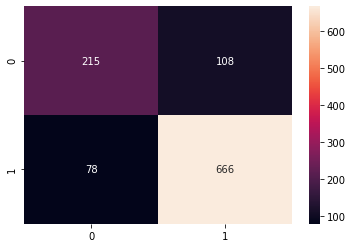

0.6 

Accuracy Score 0.8219
F1 Score 0.8706 

Confusion Matrix


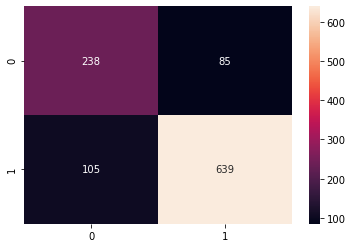

0.7 

Accuracy Score 0.8116
F1 Score 0.8577 

Confusion Matrix


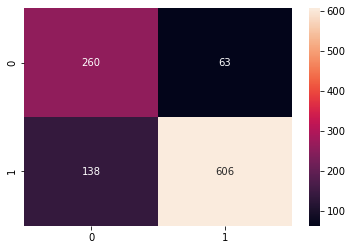

0.8 

Accuracy Score 0.7573
F1 Score 0.8036 

Confusion Matrix


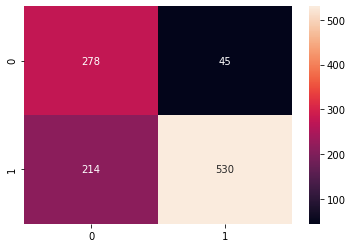

0.9 

Accuracy Score 0.6729
F1 Score 0.706 

Confusion Matrix


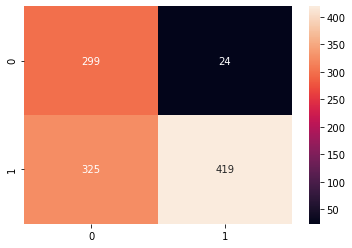

In [222]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [223]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

In [224]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.77      0.70      0.73       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.80      0.81       458
weighted avg       0.84      0.84      0.84       458
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.87      0.39      0.54       139
           1       0.79      0.97      0.87       319

    accuracy                           0.80       458
   macro avg       0.83      0.68      0.70       458
weighted avg       0.81      0.80      0.77       458
 



In [225]:
LDA_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_train_f1=round(df.loc["1"][2],2)
LDA_train_recall=round(df.loc["1"][1],2)
LDA_train_precision=round(df.loc["1"][0],2)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_precision  0.86
LDA_train_recall  0.91
LDA_train_f1  0.88


In [226]:
LDA_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
LDA_test_precision=round(df.loc["1"][0],2)
LDA_test_recall=round(df.loc["1"][1],2)
LDA_test_f1=round(df.loc["1"][2],2)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_precision  0.87
LDA_test_recall  0.92
LDA_test_f1  0.9


## ------------------------------------------------------------------------------------------------------------

In [7]:
##KNN analysis
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [228]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1


In [229]:
X[["age"]] = X[["age"]].apply(zscore)

In [230]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,3,3,4,1,2,2,0
1,-1.157661,4,4,4,4,5,2,1
2,-1.221331,4,4,5,2,3,2,1
3,-1.921698,4,2,2,1,4,0,0
4,-0.839313,2,2,1,1,6,2,1


In [231]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [232]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[219 104]
 [ 70 674]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       323
           1       0.87      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [233]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8369259606373008
[[ 84  55]
 [ 29 290]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.67       139
           1       0.84      0.91      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.76      0.77       458
weighted avg       0.81      0.82      0.81       458



In [234]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [235]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8350515463917526
[[212 111]
 [ 65 679]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       323
           1       0.86      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.81      0.78      0.80      1067
weighted avg       0.83      0.84      0.83      1067



In [236]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8144104803493449
[[ 85  54]
 [ 31 288]]
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       139
           1       0.84      0.90      0.87       319

    accuracy                           0.81       458
   macro avg       0.79      0.76      0.77       458
weighted avg       0.81      0.81      0.81       458



In [237]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.22925764192139741,
 0.1834061135371179,
 0.1834061135371179,
 0.18558951965065507,
 0.1899563318777293,
 0.18122270742358082,
 0.18122270742358082,
 0.17030567685589515,
 0.15283842794759828,
 0.16157205240174677]

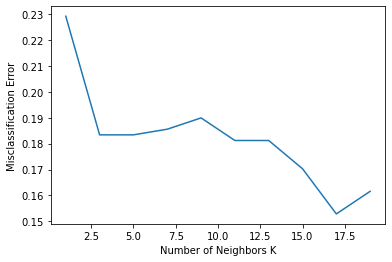

In [238]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [239]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [240]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8284910965323337
[[197 126]
 [ 57 687]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       323
           1       0.85      0.92      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.77      0.78      1067
weighted avg       0.82      0.83      0.82      1067



In [241]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8471615720524017
[[ 92  47]
 [ 23 296]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       139
           1       0.86      0.93      0.89       319

    accuracy                           0.85       458
   macro avg       0.83      0.79      0.81       458
weighted avg       0.84      0.85      0.84       458



In [242]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=19)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [243]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8219306466729147
[[192 131]
 [ 59 685]]
              precision    recall  f1-score   support

           0       0.76      0.59      0.67       323
           1       0.84      0.92      0.88       744

    accuracy                           0.82      1067
   macro avg       0.80      0.76      0.77      1067
weighted avg       0.82      0.82      0.81      1067



In [244]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8384279475982532
[[ 90  49]
 [ 25 294]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.78      0.80       458
weighted avg       0.83      0.84      0.83       458



In [245]:
y_train_predict = KNN_model.predict(X_train)
y_test_predict = KNN_model.predict(X_test)

In [246]:
y_train_predict_prob = KNN_model.predict_proba(X_test)
pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.263158,0.736842
1,0.315789,0.684211
2,0.105263,0.894737
3,0.157895,0.842105
4,0.000000,1.000000


In [247]:
# Accuracy - Training Data
KNN_train_acc = KNN_model.score(X_train,y_train)
KNN_train_acc

0.8219306466729147

AUC: 0.886


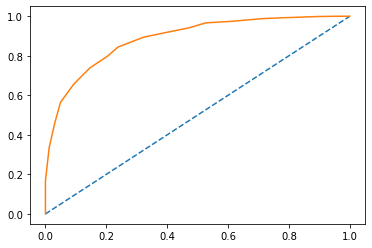

In [248]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % KNN_train_auc)
# calculate roc curve
KNN_train_fpr, KNN_train_tpr, KNN_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_train_fpr, KNN_train_tpr);

In [249]:
KNN_test_acc = KNN_model.score(X_test,y_test)
KNN_test_acc

0.8384279475982532

AUC: 0.888


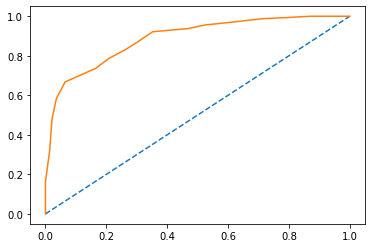

In [250]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
KNN_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % KNN_test_auc)
# calculate roc curve
KNN_test_fpr, KNN_test_tpr, KNN_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(KNN_test_fpr, KNN_test_tpr);

In [251]:
confusion_matrix(y_train, y_train_predict)

array([[192, 131],
       [ 59, 685]])

In [252]:
    print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.76      0.59      0.67       323
           1       0.84      0.92      0.88       744

    accuracy                           0.82      1067
   macro avg       0.80      0.76      0.77      1067
weighted avg       0.82      0.82      0.81      1067



In [253]:
KNN_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_train_f1=round(df.loc["1"][2],2)
KNN_train_recall=round(df.loc["1"][1],2)
KNN_train_precision=round(df.loc["1"][0],2)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_precision  0.84
KNN_train_recall  0.92
KNN_train_f1  0.88


In [254]:
confusion_matrix(y_test,y_test_predict)

array([[ 90,  49],
       [ 25, 294]])

In [255]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.78      0.80       458
weighted avg       0.83      0.84      0.83       458



In [256]:
KNN_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(KNN_metrics).transpose()
KNN_test_precision=round(df.loc["1"][0],2)
KNN_test_recall=round(df.loc["1"][1],2)
KNN_test_f1=round(df.loc["1"][2],2)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN__test_f1 ',KNN_test_f1)

KNN_test_precision  0.86
KNN_test_recall  0.92
KNN__test_f1  0.89


In [257]:
##Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [258]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [259]:
y_train_predict = NB_model.predict(X_train)
NB_model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(NB_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8219306466729147
[[223 100]
 [ 90 654]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       323
           1       0.87      0.88      0.87       744

    accuracy                           0.82      1067
   macro avg       0.79      0.78      0.79      1067
weighted avg       0.82      0.82      0.82      1067



In [260]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
NB_model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(NB_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.8471615720524017
[[101  38]
 [ 32 287]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.88      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.82       458
weighted avg       0.85      0.85      0.85       458



In [261]:
NB_train_acc = NB_model.score(X_train, y_train)
NB_train_acc

0.8219306466729147

In [262]:
NB_test_acc = NB_model.score(X_test, y_test)
NB_test_acc

0.8471615720524017

In [263]:
y_train_predict = NB_model.predict(X_train)
y_test_predict = NB_model.predict(X_test)

In [264]:
y_train_predict_prob = NB_model.predict_proba(X_test)
pd.DataFrame(y_train_predict_prob).head()

,0,1
0,0.240951,0.759049
1,0.075278,0.924722
2,0.007475,0.992525
3,0.161693,0.838307
4,0.000622,0.999378


AUC: 0.874


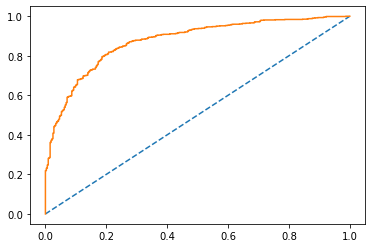

In [265]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % NB_train_auc)
# calculate roc curve
NB_train_fpr, NB_train_tpr, NB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_train_fpr, NB_train_tpr);

AUC: 0.910


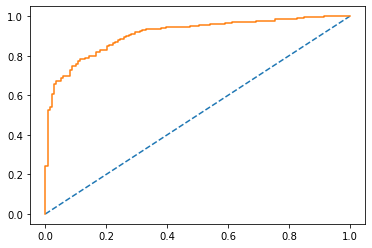

In [266]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
NB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % NB_test_auc)
# calculate roc curve
NB_test_fpr, NB_test_tpr, NB_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(NB_test_fpr, NB_test_tpr);

In [267]:
NB_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(df.loc["1"][2],2)
NB_train_recall=round(df.loc["1"][1],2)
NB_train_precision=round(df.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(NB_metrics).transpose()
NB_test_precision=round(df.loc["1"][0],2)
NB_test_recall=round(df.loc["1"][1],2)
NB_test_f1=round(df.loc["1"][2],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_train_precision  0.87
NB_train_recall  0.88
NB_train_f1  0.87
NB_test_precision  0.88
NB_test_recall  0.9
NB_test_f1  0.89


In [268]:
##Bagging and Boosting

from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model = ADB_model.fit(X_train,y_train)

In [269]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
ADB_model_score = ADB_model.score(X_train, y_train)
print(ADB_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8444236176194939
[[227  96]
 [ 70 674]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [270]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 94  45]
 [ 30 289]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.71       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



In [271]:
# Accuracy - Training Data
ADB_train_acc = ADB_model.score(X_train,y_train)
print(ADB_train_acc)

# Accuracy - Test Data
ADB_test_acc = ADB_model.score(X_test,y_test)
print(ADB_test_acc)

0.8444236176194939
0.8362445414847162


AUC: 0.902


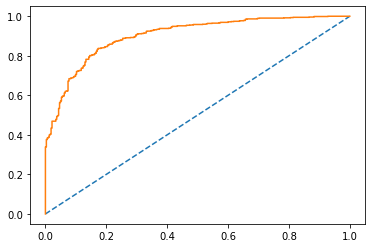

In [272]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ADB_train_auc)
# calculate roc curve
ADB_train_fpr, ADB_train_tpr, ADB_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_train_fpr, ADB_train_tpr);

AUC: 0.906


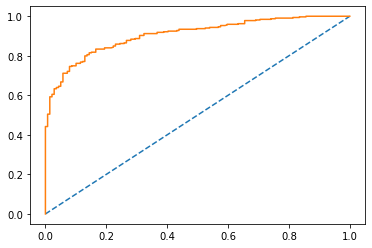

In [273]:
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
ADB_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ADB_test_auc)
# calculate roc curve
ADB_test_fpr, ADB_test_tpr, ADB_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ADB_test_fpr, ADB_test_tpr);

In [274]:
ADB_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(LDA_metrics).transpose()
ADB_train_f1=round(df.loc["1"][2],2)
ADB_train_recall=round(df.loc["1"][1],2)
ADB_train_precision=round(df.loc["1"][0],2)
print ('ADB_train_precision ',ADB_train_precision)
print ('ADB_train_recall ',ADB_train_recall)
print ('ADB_train_f1 ',ADB_train_f1)

ADB_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(ADB_metrics).transpose()
ADB_test_precision=round(df.loc["1"][0],2)
ADB_test_recall=round(df.loc["1"][1],2)
ADB_test_f1=round(df.loc["1"][2],2)
print ('ADB_test_precision ',ADB_test_precision)
print ('ADB_test_recall ',ADB_test_recall)
print ('ADB_test_f1 ',ADB_test_f1)

ADB_train_precision  0.87
ADB_train_recall  0.92
ADB_train_f1  0.9
ADB_test_precision  0.87
ADB_test_recall  0.91
ADB_test_f1  0.89


In [275]:
##Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [276]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
gbcl_model_score = gbcl.score(X_train, y_train)
print(gbcl_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.887535145267104
[[246  77]
 [ 43 701]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       323
           1       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067



In [277]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
gbcl_model_score = gbcl.score(X_test, y_test)
print(gbcl_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8384279475982532
[[ 92  47]
 [ 27 292]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



In [278]:
# Accuracy - Training Data
gbcl_train_acc = gbcl.score(X_train,y_train)
print(gbcl_train_acc)

# Accuracy - Test Data
gbcl_test_acc = gbcl.score(X_test,y_test)
print(gbcl_test_acc)

0.887535145267104
0.8384279475982532


AUC: 0.948


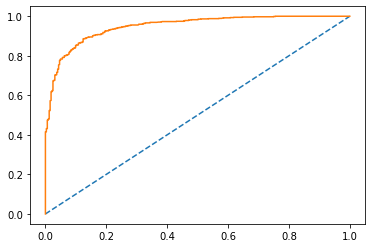

In [279]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % gbcl_train_auc)
# calculate roc curve
gbcl_train_fpr, gbcl_train_tpr, gbcl_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

AUC: 0.908


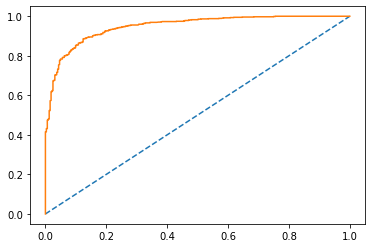

In [280]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
gbcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % gbcl_test_auc)
# calculate roc curve
gbcl_test_fpr, gbcl_test_tpr, gbcl_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(gbcl_train_fpr, gbcl_train_tpr);

In [281]:
gbcl_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_train_f1=round(df.loc["1"][2],2)
gbcl_train_recall=round(df.loc["1"][1],2)
gbcl_train_precision=round(df.loc["1"][0],2)
print ('gbcl_train_precision ',gbcl_train_precision)
print ('gbcl_train_recall ',gbcl_train_recall)
print ('gbcl_train_f1 ',gbcl_train_f1)

gbcl_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(gbcl_metrics).transpose()
gbcl_test_precision=round(df.loc["1"][0],2)
gbcl_test_recall=round(df.loc["1"][1],2)
gbcl_test_f1=round(df.loc["1"][2],2)
print ('gbcl_test_precision ',gbcl_test_precision)
print ('gbcl_test_recall ',gbcl_test_recall)
print ('gbcl_test_f1 ',gbcl_test_f1)

gbcl_train_precision  0.9
gbcl_train_recall  0.94
gbcl_train_f1  0.92
gbcl_test_precision  0.86
gbcl_test_recall  0.92
gbcl_test_f1  0.89


In [282]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [283]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
DT_model_score = DT_model.score(X_train, y_train)
print(DT_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[323   0]
 [  1 743]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [284]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
DT_model_score = DT_model.score(X_test, y_test)
print(DT_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7663755458515283
[[ 84  55]
 [ 52 267]]
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       139
           1       0.83      0.84      0.83       319

    accuracy                           0.77       458
   macro avg       0.72      0.72      0.72       458
weighted avg       0.76      0.77      0.77       458



In [285]:
# Accuracy - Training Data
DT_train_acc = DT_model.score(X_train,y_train)
print(DT_train_acc)

# Accuracy - Test Data
DT_test_acc = DT_model.score(X_test,y_test)
print(DT_test_acc)

0.9990627928772259
0.7663755458515283


AUC: 1.000


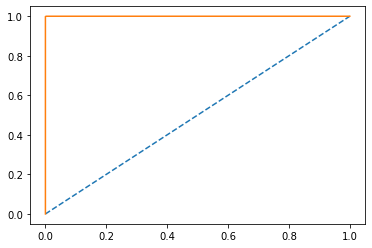

In [286]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DT_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % DT_train_auc)
# calculate roc curve
DT_train_fpr, DT_train_tpr, DT_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_train_fpr, DT_train_tpr);

AUC: 0.721


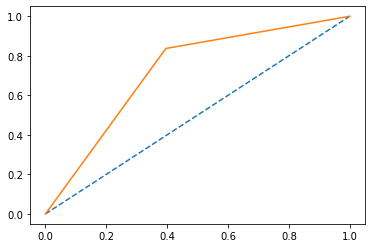

In [287]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
DT_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % DT_test_auc)
# calculate roc curve
DT_test_fpr, DT_test_tpr, DT_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(DT_test_fpr, DT_test_tpr);

In [288]:
DT_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_train_f1=round(df.loc["1"][2],2)
DT_train_recall=round(df.loc["1"][1],2)
DT_train_precision=round(df.loc["1"][0],2)
print ('DT_train_precision ',DT_train_precision)
print ('DT_train_recall ',DT_train_recall)
print ('DT_train_f1 ',DT_train_f1)

DT_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(DT_metrics).transpose()
DT_test_precision=round(df.loc["1"][0],2)
DT_test_recall=round(df.loc["1"][1],2)
DT_test_f1=round(df.loc["1"][2],2)
print ('DT_test_precision ',DT_test_precision)
print ('DT_test_recall ',DT_test_recall)
print ('DT_test_f1 ',DT_test_f1)

DT_train_precision  1.0
DT_train_recall  1.0
DT_train_f1  1.0
DT_test_precision  0.83
DT_test_recall  0.84
DT_test_f1  0.83


In [289]:
##Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [290]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
bag_model_score = Bagging_model.score(X_train, y_train)
print(bag_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[322   1]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [291]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
bag_model_score = Bagging_model.score(X_test, y_test)
print(bag_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8209606986899564
[[ 90  49]
 [ 33 286]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       139
           1       0.85      0.90      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [292]:
# Accuracy - Training Data
bagging_train_acc = Bagging_model.score(X_train,y_train)
print(bagging_train_acc)

# Accuracy - Test Data
bagging_test_acc = Bagging_model.score(X_test,y_test)
print(bagging_test_acc)

0.9990627928772259
0.8209606986899564


AUC: 1.000


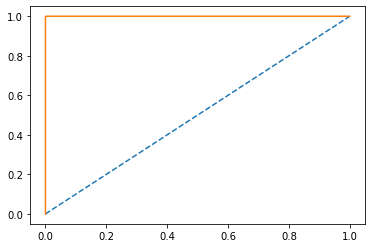

In [293]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr);

AUC: 0.895


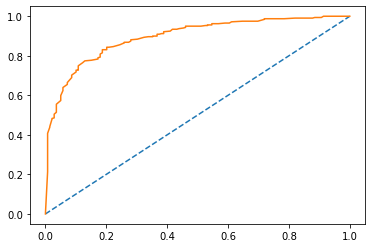

In [294]:
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr);

In [295]:
bagging_metrics=classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
bagging_train_f1=round(df.loc["1"][2],2)
bagging_train_recall=round(df.loc["1"][1],2)
bagging_train_precision=round(df.loc["1"][0],2)
print ('bagging_train_precision ',bagging_train_precision)
print ('bagging_train_recall ',bagging_train_recall)
print ('bagging_train_f1 ',bagging_train_f1)

bagging_metrics=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(bagging_metrics).transpose()
bagging_test_precision=round(df.loc["1"][0],2)
bagging_test_recall=round(df.loc["1"][1],2)
bagging_test_f1=round(df.loc["1"][2],2)
print ('bagging_test_precision ',bagging_test_precision)
print ('bagging_test_recall ',bagging_test_recall)
print ('bagging_test_f1 ',bagging_test_f1)

bagging_train_precision  1.0
bagging_train_recall  1.0
bagging_train_f1  1.0
bagging_test_precision  0.85
bagging_test_recall  0.9
bagging_test_f1  0.87


In [296]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logit Train':[Logit_train_acc,Logit_train_auc,Logit_train_recall,Logit_train_precision,Logit_train_f1],
        'Logit Test':[Logit_test_acc,Logit_test_auc,Logit_test_recall,Logit_test_precision,Logit_test_f1],
       'LDA Train':[LDA_train_acc,LDA_train_auc,LDA_train_recall,LDA_train_precision,LDA_train_f1],
        'LDA Test':[LDA_test_acc,LDA_test_auc,LDA_test_recall,LDA_test_precision,LDA_test_f1],
       'KNN Train':[KNN_train_acc,KNN_train_auc,KNN_train_recall,KNN_train_precision,KNN_train_f1],
        'KNN Test':[KNN_test_acc,KNN_test_auc,KNN_test_recall,KNN_test_precision,KNN_test_f1],
       'NB Train':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
       'ADB Train':[ADB_train_acc,ADB_train_auc,ADB_train_recall,ADB_train_precision,ADB_train_f1],
        'ADB Test':[ADB_test_acc,ADB_test_auc,ADB_test_recall,ADB_test_precision,ADB_test_f1],
       'gbcl Train':[gbcl_train_acc,gbcl_train_auc,gbcl_train_recall,gbcl_train_precision,gbcl_train_f1],
        'gbcl Test':[gbcl_test_acc,gbcl_test_auc,gbcl_test_recall,gbcl_test_precision,gbcl_test_f1],
       'DT Train':[DT_train_acc,DT_train_auc,DT_train_recall,DT_train_precision,DT_train_f1],
        'DT Test':[DT_test_acc,DT_test_auc,DT_test_recall,DT_test_precision,DT_test_f1],
       'Bagging Train':[bagging_train_acc,bag_train_auc,bagging_train_recall,bagging_train_precision,bagging_train_f1],
        'Bagging Test':[bagging_test_acc,bag_test_auc,bagging_test_recall,bagging_test_precision,bagging_test_f1]},index=index)
round(data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,ADB Train,ADB Test,gbcl Train,gbcl Test,DT Train,DT Test,Bagging Train,Bagging Test
Accuracy,0.83,0.85,0.83,0.84,0.82,0.84,0.82,0.85,0.84,0.84,0.89,0.84,1.0,0.77,1.0,0.82
AUC,0.88,0.91,0.88,0.91,0.89,0.89,0.87,0.91,0.90,0.91,0.95,0.91,1.0,0.72,1.0,0.89
Recall,0.91,0.92,0.91,0.92,0.92,0.92,0.88,0.90,0.92,0.91,0.94,0.92,1.0,0.84,1.0,0.90
Precision,0.86,0.87,0.86,0.87,0.84,0.86,0.87,0.88,0.87,0.87,0.90,0.86,1.0,0.83,1.0,0.85
F1 Score,0.88,0.90,0.88,0.90,0.88,0.89,0.87,0.89,0.90,0.89,0.92,0.89,1.0,0.83,1.0,0.87
